### transmission matrix - analytic formulas

In [3]:
## normal incidence

from sympy import *
from IPython.display import display, Math

from sympy.utilities.lambdify import lambdastr

from Electromagnetics import Misc

a1, a2, b1, b2 = symbols('a_1 a_2 b_1 b_2')
n1, n2 = symbols('n_1 n_2')

#  a1 + b1 = a2 + b2
# (a1 - b1)/eta_1 = (a2 - b2)/eta_2  or for nonmagnetic material (mu_r=1): (a1 - b1)*n1 = (a2 - b2)*n2

A = Matrix([[1, 1],
            [n1/n2, -n1/n2]])

B = Matrix([[1,  1],
            [1, -1]])


B_inv = Inverse(B).doit()

TM = B_inv*A

display(Math(latex(TM)))

TM_str = lambdastr((n1, n2), TM).replace('\\', '').replace('{', '').replace('}', '')
print('TM_str = \n', TM_str)

TM_str = Misc.replace_whole_word(TM_str, 'I', '1j')
TM_str = Misc.replace_whole_word(TM_str, 'ImmutableMatrix', 'np.array')
print('TM_str = \n', TM_str)



<IPython.core.display.Math object>

TM_str = 
 lambda n_1,n_2: (ImmutableMatrix([[n_1/(2*n_2) + 1/2, -n_1/(2*n_2) + 1/2], [-n_1/(2*n_2) + 1/2, n_1/(2*n_2) + 1/2]]))
TM_str = 
 lambda n_1,n_2: (np.array([[n_1/(2*n_2) + 1/2, -n_1/(2*n_2) + 1/2], [-n_1/(2*n_2) + 1/2, n_1/(2*n_2) + 1/2]]))


### TE oblique

In [15]:
## oblique incidence TE (E is tangent to the intrface)

from sympy import *
from IPython.display import display, Math

from sympy.utilities.lambdify import lambdastr

from Electromagnetics import Misc
from Electromagnetics.VectorCalculus import crossproduct

E_x1p, E_x2p = symbols('E_{x1}^+ E_{x2}^+')
E_x1m, E_x2m = symbols('E_{x1}^- E_{x2}^-')
a1, a2, b1, b2 = symbols('a_1 a_2 b_1 b_2')
n1, n2 = symbols('n_1 n_2')
k_0, k_t = symbols('k_0 k_t')
k_z1, k_z2 = symbols('k_{z1} k_{z2}')
eta_0 = symbols(r'\eta_0')

k_z1_sub = sqrt(k_0**2*n1**2 - k_t**2)
k_z2_sub = sqrt(k_0**2*n2**2 - k_t**2)

k_1p = Matrix([[0, k_t, +k_z1]])/(k_0*n1)
k_1m = Matrix([[0, k_t, -k_z1]])/(k_0*n1)
k_2p = Matrix([[0, k_t, +k_z2]])/(k_0*n2)
k_2m = Matrix([[0, k_t, -k_z2]])/(k_0*n2)

print('unit k vectors:')
display(Math('k_1^+ = '+latex(k_1p)))
display(Math('k_1^- = '+latex(k_1m)))
display(Math('k_2^+ = '+latex(k_2p)))
display(Math('k_2^- = '+latex(k_2m)))


E_1p = Matrix([[E_x1p, 0, 0]])
E_1m = Matrix([[E_x1m, 0, 0]])
E_2p = Matrix([[E_x2p, 0, 0]])
E_2m = Matrix([[E_x2m, 0, 0]])

print('Electric field:')
display(Math('E_1^+ = '+latex(E_1p)))
display(Math('E_1^- = '+latex(E_1m)))
display(Math('E_2^+ = '+latex(E_2p)))
display(Math('E_2^- = '+latex(E_2m)))


H_1p = crossproduct(k_1p, E_1p)*n1/eta_0
H_1m = crossproduct(k_1m, E_1m)*n1/eta_0
H_2p = crossproduct(k_2p, E_2p)*n2/eta_0
H_2m = crossproduct(k_2m, E_2m)*n2/eta_0

print('Magnetic field:')
display(Math('H_1^+ = '+latex(H_1p)))
display(Math('H_1^- = '+latex(H_1m)))
display(Math('H_2^+ = '+latex(H_2p)))
display(Math('H_2^- = '+latex(H_2m)))


a_z = Matrix([[0, 0, 1]])

eq_E = crossproduct(a_z, E_1p+E_1m-E_2p-E_2m)[1]
eq_H = crossproduct(a_z, H_1p+H_1m-H_2p-H_2m)[0]

display(Math('Eq_E = '+latex(eq_E)))
display(Math('Eq_H = '+latex(eq_H)))


E_x2pm = solve([eq_E, eq_H], [E_x2p, E_x2m])
display(Math('E_x2pm = '+latex(E_x2pm)))


E_x2p_sub = E_x2pm[E_x2p]
E_x2m_sub = E_x2pm[E_x2m]
display(Math('E_x2p = '+latex(E_x2p)))
display(Math('E_x2m = '+latex(E_x2m)))


TM =  Matrix([[E_x2p_sub.subs([(E_x1p, 1), (E_x1m, 0)]), E_x2p_sub.subs([(E_x1p, 0), (E_x1m, 1)])],
            [E_x2m_sub.subs([(E_x1p, 1), (E_x1m, 0)]), E_x2m_sub.subs([(E_x1p, 0), (E_x1m, 1)])]])
display(Math('TM = '+latex(TM)))


TM_str = lambdastr((n1, n2), TM).replace('\\', '').replace('{', '').replace('}', '')
print('TM_str = \n', TM_str)

TM_str = Misc.replace_whole_word(TM_str, 'I', '1j')
TM_str = Misc.replace_whole_word(TM_str, 'MutableDenseMatrix', 'np.array')
print('TM_str = \n', TM_str)

k_z1_str = lambdastr(n1, k_z1_sub).replace('\\', '').replace('{', '').replace('}', '')
print('k_z1_str = \n', k_z1_str)



unit k vectors:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Electric field:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Magnetic field:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

TM_str = 
 lambda n_1,n_2: (MutableDenseMatrix([[(k_z1 + k_z2)/(2*k_z2), (-k_z1 + k_z2)/(2*k_z2)], [(-k_z1 + k_z2)/(2*k_z2), (k_z1 + k_z2)/(2*k_z2)]]))
TM_str = 
 lambda n_1,n_2: (np.array([[(k_z1 + k_z2)/(2*k_z2), (-k_z1 + k_z2)/(2*k_z2)], [(-k_z1 + k_z2)/(2*k_z2), (k_z1 + k_z2)/(2*k_z2)]]))
k_z1_str = 
 lambda n_1: (sqrt(k_0**2*n_1**2 - k_t**2))


### TM oblique

In [16]:
## oblique incidence TM (H is tangent to the intrface)

from sympy import *
from IPython.display import display, Math

from sympy.utilities.lambdify import lambdastr

from Electromagnetics import Misc
from Electromagnetics.VectorCalculus import crossproduct

H_x1p, H_x2p = symbols('H_{x1}^+ H_{x2}^+')
H_x1m, H_x2m = symbols('H_{x1}^- H_{x2}^-')
a1, a2, b1, b2 = symbols('a_1 a_2 b_1 b_2')
n1, n2 = symbols('n_1 n_2')
k_0, k_t = symbols('k_0 k_t')
k_z1, k_z2 = symbols('k_{z1} k_{z2}')
eta_0 = symbols(r'\eta_0')

k_z1_sub = sqrt(k_0**2*n1**2 - k_t**2)
k_z2_sub = sqrt(k_0**2*n2**2 - k_t**2)

k_1p = Matrix([[0, k_t, +k_z1]])/(k_0*n1)
k_1m = Matrix([[0, k_t, -k_z1]])/(k_0*n1)
k_2p = Matrix([[0, k_t, +k_z2]])/(k_0*n2)
k_2m = Matrix([[0, k_t, -k_z2]])/(k_0*n2)

print('unit k vectors:')
display(Math('k_1^+ = '+latex(k_1p)))
display(Math('k_1^- = '+latex(k_1m)))
display(Math('k_2^+ = '+latex(k_2p)))
display(Math('k_2^- = '+latex(k_2m)))

H_1p = Matrix([[H_x1p, 0, 0]])
H_1m = Matrix([[H_x1m, 0, 0]])
H_2p = Matrix([[H_x2p, 0, 0]])
H_2m = Matrix([[H_x2m, 0, 0]])

print('Magnetic field:')
display(Math('H_1^+ = '+latex(H_1p)))
display(Math('H_1^- = '+latex(H_1m)))
display(Math('H_2^+ = '+latex(H_2p)))
display(Math('H_2^- = '+latex(H_2m)))


E_1p = -crossproduct(k_1p, H_1p)/n1*eta_0
E_1m = -crossproduct(k_1m, H_1m)/n1*eta_0
E_2p = -crossproduct(k_2p, H_2p)/n2*eta_0
E_2m = -crossproduct(k_2m, H_2m)/n2*eta_0

print('Electric field')
display(Math('E_1^+ = '+latex(E_1p)))
display(Math('E_1^- = '+latex(E_1m)))
display(Math('E_2^+ = '+latex(E_2p)))
display(Math('E_2^- = '+latex(E_2m)))


a_z = Matrix([[0, 0, 1]])

eq_E = crossproduct(a_z, E_1p+E_1m-E_2p-E_2m)[0]
eq_H = crossproduct(a_z, H_1p+H_1m-H_2p-H_2m)[1]

display(Math('Eq_E = '+latex(eq_E)))
display(Math('Eq_H = '+latex(eq_H)))


H_x2pm = solve([eq_E, eq_H], [H_x2p, H_x2m])
display(Math('H_x2pm = '+latex(H_x2pm)))


H_x2p_sub = H_x2pm[H_x2p]
H_x2m_sub = H_x2pm[H_x2m]
display(Math('H_x2p = '+latex(H_x2p)))
display(Math('H_x2m = '+latex(H_x2m)))


TM =  Matrix([[H_x2p_sub.subs([(H_x1p, 1), (H_x1m, 0)]), H_x2p_sub.subs([(H_x1p, 0), (H_x1m, 1)])],
            [H_x2m_sub.subs([(H_x1p, 1), (H_x1m, 0)]), H_x2m_sub.subs([(H_x1p, 0), (H_x1m, 1)])]])
display(Math('TM = '+latex(TM)))


TM_str = lambdastr((n1, n2), TM).replace('\\', '').replace('{', '').replace('}', '')
print('TM_str = \n', TM_str)

TM_str = Misc.replace_whole_word(TM_str, 'I', '1j')
TM_str = Misc.replace_whole_word(TM_str, 'MutableDenseMatrix', 'np.array')
print('TM_str = \n', TM_str)

k_z1_str = lambdastr(n1, k_z1_sub).replace('\\', '').replace('{', '').replace('}', '')
print('k_z1_str = \n', k_z1_str)



unit k vectors:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Magnetic field:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Electric field


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

TM_str = 
 lambda n_1,n_2: (MutableDenseMatrix([[(k_z1*n_2**2 + k_z2*n_1**2)/(2*k_z2*n_1**2), (-k_z1*n_2**2 + k_z2*n_1**2)/(2*k_z2*n_1**2)], [(-k_z1*n_2**2 + k_z2*n_1**2)/(2*k_z2*n_1**2), (k_z1*n_2**2 + k_z2*n_1**2)/(2*k_z2*n_1**2)]]))
TM_str = 
 lambda n_1,n_2: (np.array([[(k_z1*n_2**2 + k_z2*n_1**2)/(2*k_z2*n_1**2), (-k_z1*n_2**2 + k_z2*n_1**2)/(2*k_z2*n_1**2)], [(-k_z1*n_2**2 + k_z2*n_1**2)/(2*k_z2*n_1**2), (k_z1*n_2**2 + k_z2*n_1**2)/(2*k_z2*n_1**2)]]))
k_z1_str = 
 lambda n_1: (sqrt(k_0**2*n_1**2 - k_t**2))


### TE oblique epsilon-mu

In [8]:
## oblique incidence TE (E is tangent to the intrface)

from sympy import *
from IPython.display import display, Math

from sympy.utilities.lambdify import lambdastr

from Electromagnetics import Misc
from Electromagnetics.VectorCalculus import crossproduct

E_x1p, E_x2p = symbols('E_{x1}^+ E_{x2}^+')
E_x1m, E_x2m = symbols('E_{x1}^- E_{x2}^-')
a1, a2, b1, b2 = symbols('a_1 a_2 b_1 b_2')
eps_1, eps_2, mu_1, mu_2 = symbols(r'\epsilon_1 \epsilon_2 \mu_1 \mu_2', real=True, positive=True)
k_0, k_t = symbols('k_0 k_t')
k_z1, k_z2 = symbols('k_{z1} k_{z2}')
eta_0, eta_1, eta_2 = symbols(r'\eta_0 \eta_1 \eta_2')

k_z1_sub = sqrt(k_0**2*eps_1*mu_1 - k_t**2)
k_z2_sub = sqrt(k_0**2*eps_2*mu_2 - k_t**2)

k_1p = Matrix([[0, k_t, +k_z1]])/(k_0*sqrt(eps_1*mu_1))
k_1m = Matrix([[0, k_t, -k_z1]])/(k_0*sqrt(eps_1*mu_1))
k_2p = Matrix([[0, k_t, +k_z2]])/(k_0*sqrt(eps_2*mu_2))
k_2m = Matrix([[0, k_t, -k_z2]])/(k_0*sqrt(eps_2*mu_2))

print('unit k vectors:')
display(Math('k_1^+ = '+latex(k_1p)))
display(Math('k_1^- = '+latex(k_1m)))
display(Math('k_2^+ = '+latex(k_2p)))
display(Math('k_2^- = '+latex(k_2m)))


E_1p = Matrix([[E_x1p, 0, 0]])
E_1m = Matrix([[E_x1m, 0, 0]])
E_2p = Matrix([[E_x2p, 0, 0]])
E_2m = Matrix([[E_x2m, 0, 0]])

print('Electric field:')
display(Math('E_1^+ = '+latex(E_1p)))
display(Math('E_1^- = '+latex(E_1m)))
display(Math('E_2^+ = '+latex(E_2p)))
display(Math('E_2^- = '+latex(E_2m)))


H_1p = crossproduct(k_1p, E_1p)/eta_1
H_1m = crossproduct(k_1m, E_1m)/eta_1
H_2p = crossproduct(k_2p, E_2p)/eta_2
H_2m = crossproduct(k_2m, E_2m)/eta_2

print('Magnetic field:')
display(Math('H_1^+ = '+latex(H_1p)))
display(Math('H_1^- = '+latex(H_1m)))
display(Math('H_2^+ = '+latex(H_2p)))
display(Math('H_2^- = '+latex(H_2m)))


a_z = Matrix([[0, 0, 1]])

eq_E = crossproduct(a_z, E_1p+E_1m-E_2p-E_2m)[1]
eq_H = crossproduct(a_z, H_1p+H_1m-H_2p-H_2m)[0]

display(Math('Eq_E = '+latex(eq_E)))
display(Math('Eq_H = '+latex(eq_H)))


E_x2pm = solve([eq_E, eq_H], [E_x2p, E_x2m])
display(Math('E_x2pm = '+latex(E_x2pm)))


E_x2p_sub = E_x2pm[E_x2p]
E_x2m_sub = E_x2pm[E_x2m]
display(Math('E_x2p = '+latex(E_x2p_sub)))
display(Math('E_x2m = '+latex(E_x2m_sub)))

E_x2p_sub = E_x2p_sub.subs([(eta_1, sqrt(mu_1/eps_1)), (eta_2, sqrt(mu_2/eps_2))])
E_x2m_sub = E_x2m_sub.subs([(eta_1, sqrt(mu_1/eps_1)), (eta_2, sqrt(mu_2/eps_2))])


TM =  Matrix([[E_x2p_sub.subs([(E_x1p, 1), (E_x1m, 0)]), E_x2p_sub.subs([(E_x1p, 0), (E_x1m, 1)])],
            [E_x2m_sub.subs([(E_x1p, 1), (E_x1m, 0)]), E_x2m_sub.subs([(E_x1p, 0), (E_x1m, 1)])]])
TM = Misc.SymMatrixSimplify(TM)
display(Math('TM = '+latex(TM)))

TM_str = lambdastr((eps_1, eps_2, mu_1, mu_2), TM).replace('\\', '').replace('{', '').replace('}', '')
print('TM_str = \n', TM_str)

TM_str = Misc.replace_whole_word(TM_str, 'I', '1j')
TM_str = Misc.replace_whole_word(TM_str, 'MutableDenseMatrix', 'np.array')
print('TM_str = \n', TM_str)

k_z1_str = lambdastr(eps_1, k_z1_sub).replace('\\', '').replace('{', '').replace('}', '')
print('k_z1_str = \n', k_z1_str)



unit k vectors:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Electric field:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Magnetic field:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

TM_str = 
 lambda epsilon_1,epsilon_2,mu_1,mu_2: (MutableDenseMatrix([[(mu_1*k_z2 + mu_2*k_z1)/(2*mu_1*k_z2), (mu_1*k_z2 - mu_2*k_z1)/(2*mu_1*k_z2)], [(mu_1*k_z2 - mu_2*k_z1)/(2*mu_1*k_z2), (mu_1*k_z2 + mu_2*k_z1)/(2*mu_1*k_z2)]]))
TM_str = 
 lambda epsilon_1,epsilon_2,mu_1,mu_2: (np.array([[(mu_1*k_z2 + mu_2*k_z1)/(2*mu_1*k_z2), (mu_1*k_z2 - mu_2*k_z1)/(2*mu_1*k_z2)], [(mu_1*k_z2 - mu_2*k_z1)/(2*mu_1*k_z2), (mu_1*k_z2 + mu_2*k_z1)/(2*mu_1*k_z2)]]))
k_z1_str = 
 lambda epsilon_1: (sqrt(epsilon_1*mu_1*k_0**2 - k_t**2))


### TM oblique epsilon-mu

In [10]:
## oblique incidence TM (H is tangent to the intrface)

from sympy import *
from IPython.display import display, Math

from sympy.utilities.lambdify import lambdastr

from Electromagnetics import Misc
from Electromagnetics.VectorCalculus import crossproduct

H_x1p, H_x2p = symbols('H_{x1}^+ H_{x2}^+')
H_x1m, H_x2m = symbols('H_{x1}^- H_{x2}^-')
a1, a2, b1, b2 = symbols('a_1 a_2 b_1 b_2')
eps_1, eps_2, mu_1, mu_2 = symbols(r'\epsilon_1 \epsilon_2 \mu_1 \mu_2', real=True, positive=True)
k_0, k_t = symbols('k_0 k_t')
k_z1, k_z2 = symbols('k_{z1} k_{z2}')
eta_0, eta_1, eta_2 = symbols(r'\eta_0 \eta_1 \eta_2')


k_z1_sub = sqrt(k_0**2*eps_1*mu_1 - k_t**2)
k_z2_sub = sqrt(k_0**2*eps_2*mu_2 - k_t**2)

k_1p = Matrix([[0, k_t, +k_z1]])/(k_0*sqrt(eps_1*mu_1))
k_1m = Matrix([[0, k_t, -k_z1]])/(k_0*sqrt(eps_1*mu_1))
k_2p = Matrix([[0, k_t, +k_z2]])/(k_0*sqrt(eps_2*mu_2))
k_2m = Matrix([[0, k_t, -k_z2]])/(k_0*sqrt(eps_2*mu_2))

print('unit k vectors:')
display(Math('k_1^+ = '+latex(k_1p)))
display(Math('k_1^- = '+latex(k_1m)))
display(Math('k_2^+ = '+latex(k_2p)))
display(Math('k_2^- = '+latex(k_2m)))

H_1p = Matrix([[H_x1p, 0, 0]])
H_1m = Matrix([[H_x1m, 0, 0]])
H_2p = Matrix([[H_x2p, 0, 0]])
H_2m = Matrix([[H_x2m, 0, 0]])

print('Magnetic field:')
display(Math('H_1^+ = '+latex(H_1p)))
display(Math('H_1^- = '+latex(H_1m)))
display(Math('H_2^+ = '+latex(H_2p)))
display(Math('H_2^- = '+latex(H_2m)))


E_1p = -crossproduct(k_1p, H_1p)*eta_1
E_1m = -crossproduct(k_1m, H_1m)*eta_1
E_2p = -crossproduct(k_2p, H_2p)*eta_2
E_2m = -crossproduct(k_2m, H_2m)*eta_2

print('Electric field')
display(Math('E_1^+ = '+latex(E_1p)))
display(Math('E_1^- = '+latex(E_1m)))
display(Math('E_2^+ = '+latex(E_2p)))
display(Math('E_2^- = '+latex(E_2m)))


a_z = Matrix([[0, 0, 1]])

eq_E = crossproduct(a_z, E_1p+E_1m-E_2p-E_2m)[0]
eq_H = crossproduct(a_z, H_1p+H_1m-H_2p-H_2m)[1]

display(Math('Eq_E = '+latex(eq_E)))
display(Math('Eq_H = '+latex(eq_H)))


H_x2pm = solve([eq_E, eq_H], [H_x2p, H_x2m])
display(Math('H_x2pm = '+latex(H_x2pm)))


H_x2p_sub = H_x2pm[H_x2p]
H_x2m_sub = H_x2pm[H_x2m]
display(Math('H_x2p = '+latex(H_x2p_sub)))
display(Math('H_x2m = '+latex(H_x2m_sub)))

H_x2p_sub = H_x2p_sub.subs([(eta_1, sqrt(mu_1/eps_1)), (eta_2, sqrt(mu_2/eps_2))])
H_x2m_sub = H_x2m_sub.subs([(eta_1, sqrt(mu_1/eps_1)), (eta_2, sqrt(mu_2/eps_2))])


TM =  Matrix([[H_x2p_sub.subs([(H_x1p, 1), (H_x1m, 0)]), H_x2p_sub.subs([(H_x1p, 0), (H_x1m, 1)])],
            [H_x2m_sub.subs([(H_x1p, 1), (H_x1m, 0)]), H_x2m_sub.subs([(H_x1p, 0), (H_x1m, 1)])]])
TM = Misc.SymMatrixSimplify(TM)
display(Math('TM = '+latex(TM)))


TM_str = lambdastr((eps_1, eps_2), TM).replace('\\', '').replace('{', '').replace('}', '')
print('TM_str = \n', TM_str)

TM_str = Misc.replace_whole_word(TM_str, 'I', '1j')
TM_str = Misc.replace_whole_word(TM_str, 'MutableDenseMatrix', 'np.array')
print('TM_str = \n', TM_str)

k_z1_str = lambdastr(eps_1, k_z1_sub).replace('\\', '').replace('{', '').replace('}', '')
print('k_z1_str = \n', k_z1_str)



unit k vectors:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Magnetic field:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Electric field


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

TM_str = 
 lambda epsilon_1,epsilon_2: (MutableDenseMatrix([[(epsilon_1*k_z2 + epsilon_2*k_z1)/(2*epsilon_1*k_z2), (epsilon_1*k_z2 - epsilon_2*k_z1)/(2*epsilon_1*k_z2)], [(epsilon_1*k_z2 - epsilon_2*k_z1)/(2*epsilon_1*k_z2), (epsilon_1*k_z2 + epsilon_2*k_z1)/(2*epsilon_1*k_z2)]]))
TM_str = 
 lambda epsilon_1,epsilon_2: (np.array([[(epsilon_1*k_z2 + epsilon_2*k_z1)/(2*epsilon_1*k_z2), (epsilon_1*k_z2 - epsilon_2*k_z1)/(2*epsilon_1*k_z2)], [(epsilon_1*k_z2 - epsilon_2*k_z1)/(2*epsilon_1*k_z2), (epsilon_1*k_z2 + epsilon_2*k_z1)/(2*epsilon_1*k_z2)]]))
k_z1_str = 
 lambda epsilon_1: (sqrt(epsilon_1*mu_1*k_0**2 - k_t**2))


In [2]:

n, k, d, omega = symbols('n k d \\omega')

PM = Matrix([[exp(-I*k*d), 0],
             [0, exp(+I*k*d)]])


display(Math(latex(PM)))

PM_str = lambdastr((n, d, k), PM).replace('\\', '').replace('{', '').replace('}', '')
print('PM_str = \n', PM_str)

PM_str = Misc.replace_whole_word(PM_str, 'I', '1j')
PM_str = Misc.replace_whole_word(PM_str, 'MutableDenseMatrix', 'np.array')
print('PM_str = \n', PM_str)




<IPython.core.display.Math object>

PM_str = 
 lambda n,d,k: (MutableDenseMatrix([[exp(-I*d*k), 0], [0, exp(I*d*k)]]))
PM_str = 
 lambda n,d,k: (np.array([[exp(-1j*d*k), 0], [0, exp(1j*d*k)]]))


### dielectric PC - numerical

[[-0.97276677+0.24982697j  0.01028048+0.09264454j]
 [ 0.01028048-0.09264454j -0.97276677-0.24982697j]]
[[-0.97276677+0.24982697j  0.01028048+0.09264454j]
 [ 0.01028048-0.09264454j -0.97276677-0.24982697j]]
T: (-0.964387495186+0.247674994823j)  ---  0.995683756989
R: (-0.0130313651672-0.0918914554784j)  ---  0.0928108618
[ -9.64387495e-01 +2.47674995e-01j  -1.73472348e-18 -1.38777878e-17j]
T: (-0.964387495186+0.247674994823j)  ---  0.995683756989
R: (-0.0130313651672-0.0918914554784j)  ---  0.0928108618
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


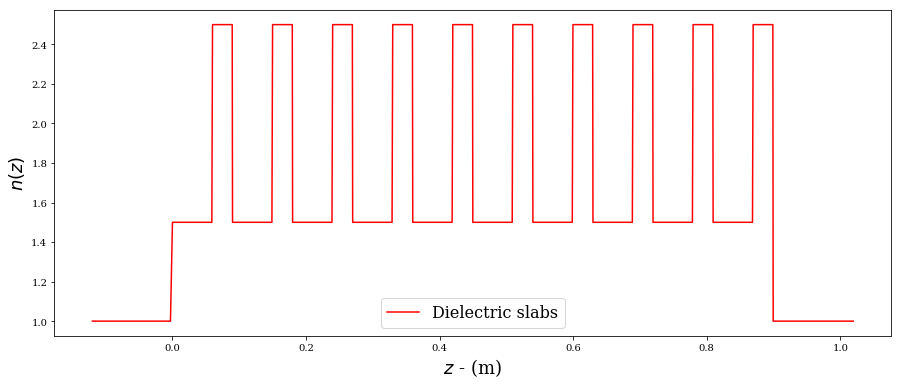

In [14]:
%reload_ext autoreload
%autoreload

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *

freq = 2.0*constants.giga
l_0 = constants.c/freq
theta = 30.0*np.pi/180.0

pc = TMM(freq, theta, TETM='TE')
pc_emn = TMM_EM_N(freq, theta, TETM='TE')

d_ratio = 0.4
n = np.array([1.5, 2.5])
d = np.array([l_0*d_ratio, l_0*d_ratio/2])

n_layer = 10

n_p, d_p = pc.RepeatProfile(n, d, n_layer)


#print(n_p)
#print(d_p)

n_0, n_1 = 1.0, 1.0
pc.SetupMultilayer(n_0, n_1, n_p, d_p)
pc_emn.SetupMultilayer(n_0, n_1, n_p, d_p)

TM = pc.GetTMTotal()
print(TM)
TM = pc_emn.GetTMTotal()
print(TM)

T, R = pc.GetTransmissionReflection()

print('T:', T, ' --- ', abs(T))
print('R:', R, ' --- ', abs(R))

print(TM.dot(np.array([1.0, R])))

T, R = pc_emn.GetTransmissionReflection()

print('T:', T, ' --- ', abs(T))
print('R:', R, ' --- ', abs(R))

%pylab inline

d_sides = d[0]*2.0
n_pts_0, n_pts_1 = 40, 40
n_pts_i = 60

[z_pts, n_vec] = pc.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
figsize(15, 6)

fig = figure()
plot(z_pts, np.real(n_vec), 'r', label='Dielectric slabs')

xlabel('$z$ - (m)', fontsize=18)
ylabel('$n(z)$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


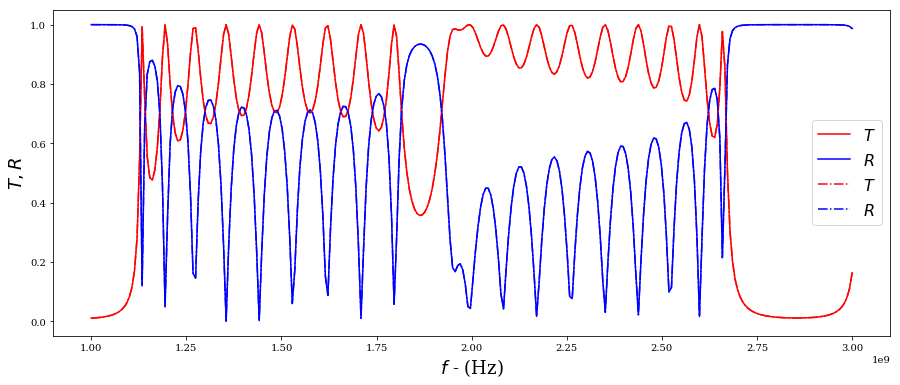

In [16]:
%pylab inline

f_0 = 1.0*constants.giga
f_1 = 3.0*constants.giga
N = 300

f, T, R = pc.GetTransmissionReflectionFreqBand(f_0, f_1, N)

figsize(15, 6)

plot(f, abs(T), 'r', label='$T$')
plot(f, abs(R), 'b', label='$R$')

f, T, R = pc_emn.GetTransmissionReflectionFreqBand(f_0, f_1, N)

figsize(15, 6)

plot(f, abs(T), 'r-.', label='$T$')
plot(f, abs(R), 'b-.', label='$R$')

xlabel('$f$ - (Hz)', fontsize=18)
ylabel('$T, R$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

import os
dir_name = './other/gradient/periodic-1'
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

savefig(dir_name + '/TrnasRefl' + file_ext)


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


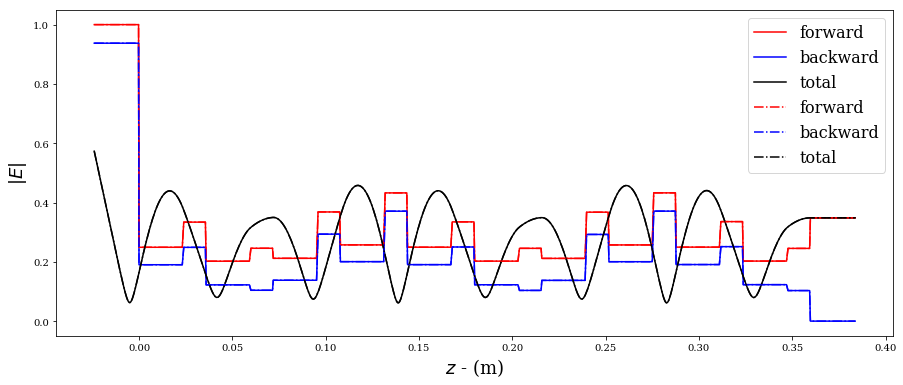

In [3]:
%pylab inline

pc.SetFrequency(1.5*constants.giga)
pc_emn.SetFrequency(1.5*constants.giga)

[z_pts, E_FWD, E_BWD] = pc.GetFieldPlot(100, 30, 100, d0=d[0], d1=d[0])
            

figsize(15, 6)
plot(z_pts, np.abs(E_FWD), 'r', label='forward')
plot(z_pts, np.abs(E_BWD), 'b', label='backward')
plot(z_pts, np.abs(E_FWD+E_BWD), 'k', label='total')

[z_pts, E_FWD, E_BWD] = pc_emn.GetFieldPlot(100, 30, 100, d0=d[0], d1=d[0])
            
plot(z_pts, np.abs(E_FWD), 'r-.', label='forward')
plot(z_pts, np.abs(E_BWD), 'b-.', label='backward')
plot(z_pts, np.abs(E_FWD+E_BWD), 'k-.', label='total')


xlabel('$z$ - (m)', fontsize=18)
ylabel('$|E|$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

savefig(dir_name + '/E_mag' + file_ext)



### Magnetodielectric PC

[[ 0.85088950+0.5902926j  -0.03044088+0.26745401j]
 [-0.03044088-0.26745401j  0.85088950-0.5902926j ]]
T: (0.79340101865+0.550410769497j)  ---  0.965627874273
R: (-0.123057744935+0.228953269988j)  ---  0.259928467904
[ 0.79340102 +5.50410769e-01j  0.00000000 +2.77555756e-17j]
T: (0.79340101865+0.550410769497j)  ---  0.965627874273
R: (-0.123057744935+0.228953269988j)  ---  0.259928467904
Populating the interactive namespace from numpy and matplotlib


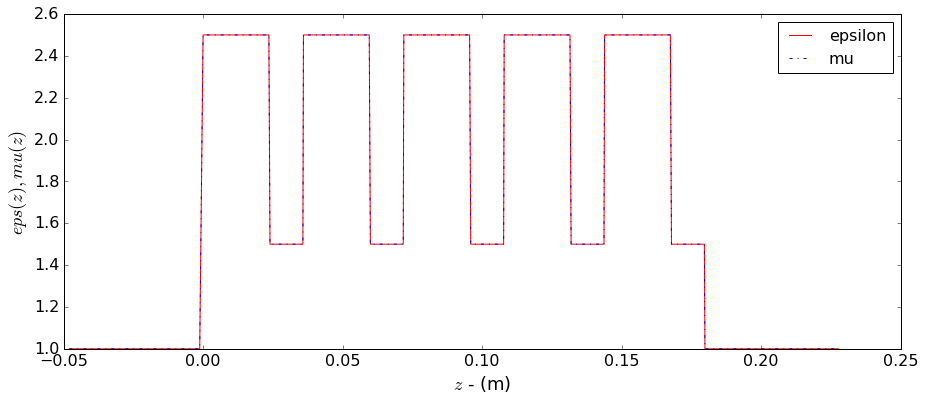

In [1]:
%reload_ext autoreload
%autoreload

import numpy as np
from scipy import constants
from Electromagnetics.TMM import *

freq = 5.0*constants.giga
l_0 = constants.c/freq
theta = 60.0*np.pi/180.0

pc_epsmu = TMM_EM_EPSMU(freq, theta, TETM='TM')

d_ratio = 0.4
eps = np.array([2.5, 1.5])
mu = np.array([2.5, 1.5])
d = np.array([l_0*d_ratio, l_0*d_ratio/2])

n_layer = 5

eps_p, mu_p, d_p = pc_epsmu.RepeatProfile(eps, mu, d, n_layer)

eps_0, eps_1 = 1.0, 1.0
mu_0, mu_1 = 1.0, 1.0
pc_epsmu.SetupMultilayer((eps_0, mu_0), (eps_1, mu_1), eps_p, mu_p, d_p)

TM = pc_epsmu.GetTMTotal()
print(TM)

T, R = pc_epsmu.GetTransmissionReflection()

print('T:', T, ' --- ', abs(T))
print('R:', R, ' --- ', abs(R))

print(TM.dot(np.array([1.0, R])))

T, R = pc_epsmu.GetTransmissionReflection()

print('T:', T, ' --- ', abs(T))
print('R:', R, ' --- ', abs(R))

%pylab inline

d_sides = d[0]*2.0
n_pts_0, n_pts_1 = 40, 40
n_pts_i = 60

[z_pts, eps_vec, mu_vec] = pc_epsmu.GetMediumPlot(n_pts_0, n_pts_i, n_pts_1, d_sides, d_sides)
figsize(15, 6)

fig = figure()
plot(z_pts, np.real(eps_vec), 'r', label='epsilon')
plot(z_pts, np.real(mu_vec), 'b-.', label='mu')

xlabel('$z$ - (m)', fontsize=18)
ylabel('$eps(z), mu(z)$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)


Populating the interactive namespace from numpy and matplotlib


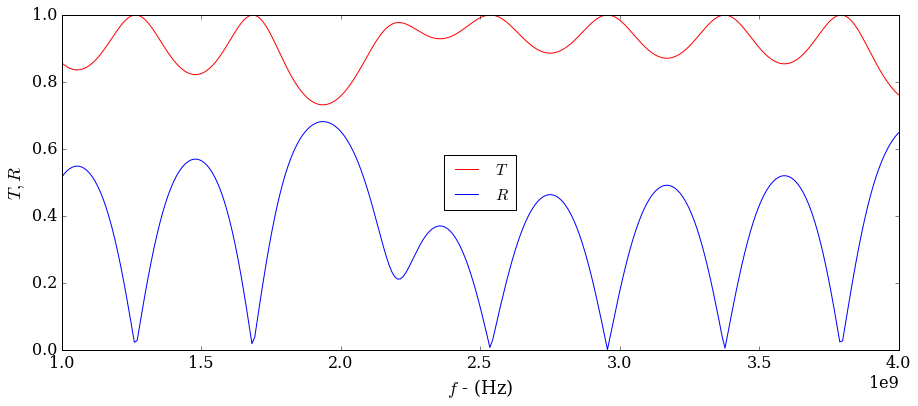

In [2]:
%pylab inline

f_0 = 1.0*constants.giga
f_1 = 4.0*constants.giga
N = 300

f, T, R = pc_epsmu.GetTransmissionReflectionFreqBand(f_0, f_1, N)

figsize(15, 6)

plot(f, abs(T), 'r', label='$T$')
plot(f, abs(R), 'b', label='$R$')

xlabel('$f$ - (Hz)', fontsize=18)
ylabel('$T, R$', fontsize=18)
legend(loc='best', fontsize=16)

font = {'family' : 'serif', 'weight' : 'normal', 'size'   : 16}
matplotlib.rc('font', **font)

import os
dir_name = './other/gradient/periodic-1'
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

savefig(dir_name + '/TrnasRefl' + file_ext)


### Symbolic TMM

In [3]:
from Electromagnetics.TMM_sym import *
from sympy import symbols, Symbol, latex
from IPython.display import display, Math



pc_emn = TMM_sym_EM_N(TETM='TE')

n_arr = [Symbol('n')]
d_arr = [Symbol('d')]
k_z_arr = [Symbol('k_z')]

n_0, n_1 = symbols('n_0 n_1')
k_z0, k_z1 = symbols('k_{z0} k_{z1}')

pc_emn.SetupMultilayer((n_0, k_z0), (n_1, k_z1), (n_arr, k_z_arr), d_arr)


TM = pc_emn.GetTMTotal()
display(Math(latex(TM)))

RT = pc_emn.GetTransmissionReflection()

display(Math(latex(RT)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>